In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf
from keras.models import *
from keras.layers import *
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.optimizers import *
import seaborn as sns

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test = pd.read_csv('test.csv')
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


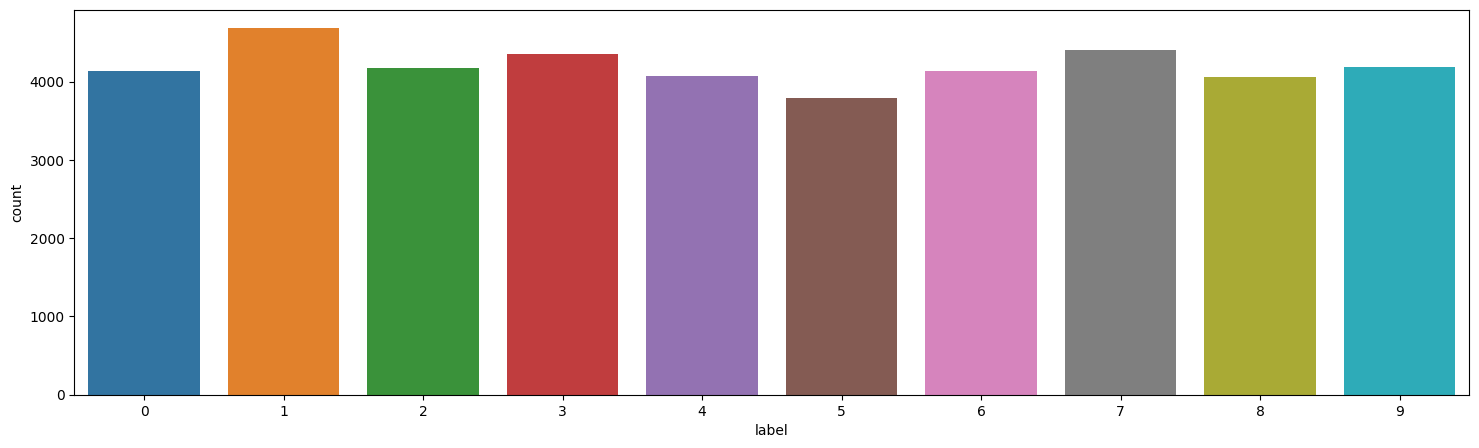

In [5]:
plt.figure(figsize=(18, 5))
sns.countplot(data=df_train, x='label')
plt.show()

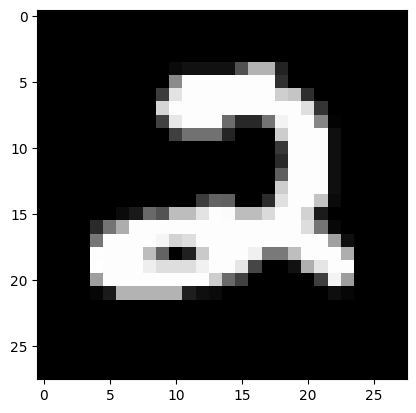

In [6]:
plt.imshow(df_test.values.reshape((28000, 28, 28))[0], cmap='gray')

In [7]:
x = df_train.drop('label', axis= 1)
y = df_train['label']

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, stratify=y)

In [9]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((33600, 784), (33600,), (8400, 784), (8400,))

In [10]:
y_train = y_train.values
x_train = x_train.values.reshape((x_train.shape[0], 28, 28, 1)).astype(np.float32)
y_val = y_val.values
x_val = x_val.values.reshape((x_val.shape[0], 28, 28, 1)).astype(np.float32)
x_test = df_test.values.reshape((df_test.shape[0], 28, 28, 1)).astype(np.float32)

In [11]:
x_test.shape

(28000, 28, 28, 1)

In [12]:
gen = ImageDataGenerator(rescale= 1./255, 
                         # rotation_range=40, 
                         width_shift_range=0.2, height_shift_range=0.2,
                         horizontal_flip=False, fill_mode='nearest')
train_gen = gen.flow(x_train, y_train, batch_size=32)
val_gen = gen.flow(x_val, y_val, batch_size=32)

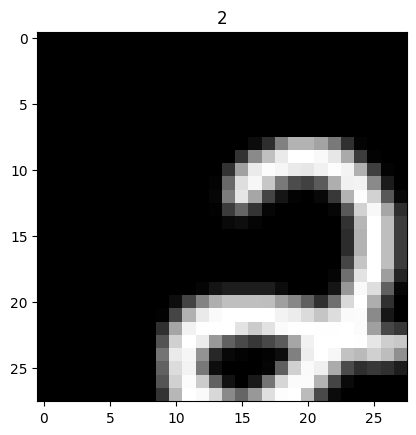

In [13]:
iterate = next(train_gen)
plt.title(iterate[1][0])
plt.imshow(iterate[0][0], cmap='gray')

In [14]:
model = Sequential()
model.add(Conv2D(256, 3, padding='same', input_shape= (28, 28, 1), activation='relu'))

model.add(Conv2D(256, 3, activation='relu'))
model.add(Conv2D(128, 3, activation='relu'))

model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Conv2D(16, 3, activation='relu'))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 256)       2560      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       590080    
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       295040    
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        73792     
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 20, 32)        18464     
                                                                 
 conv2d_5 (Conv2D)           (None, 18, 18, 16)        4624      
                                                                 
 flatten (Flatten)           (None, 5184)              0

In [15]:
history = model.fit(train_gen, validation_data=val_gen, batch_size=32, epochs=100, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))

Epoch 1/100
1050/1050 [==============================] - 32s 25ms/step - loss: 0.6183 - accuracy: 0.7961 - val_loss: 0.1978 - val_accuracy: 0.9420
Epoch 2/100
1050/1050 [==============================] - 27s 26ms/step - loss: 0.1983 - accuracy: 0.9402 - val_loss: 0.1431 - val_accuracy: 0.9569
Epoch 3/100
1050/1050 [==============================] - 29s 27ms/step - loss: 0.1432 - accuracy: 0.9553 - val_loss: 0.1021 - val_accuracy: 0.9699
Epoch 4/100
1050/1050 [==============================] - 30s 28ms/step - loss: 0.1165 - accuracy: 0.9655 - val_loss: 0.0982 - val_accuracy: 0.9689
Epoch 5/100
1050/1050 [==============================] - 30s 28ms/step - loss: 0.1012 - accuracy: 0.9690 - val_loss: 0.0836 - val_accuracy: 0.9749
Epoch 6/100
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0877 - accuracy: 0.9727 - val_loss: 0.0652 - val_accuracy: 0.9790
Epoch 7/100
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0769 - accuracy: 0.9763 - val_loss: 0

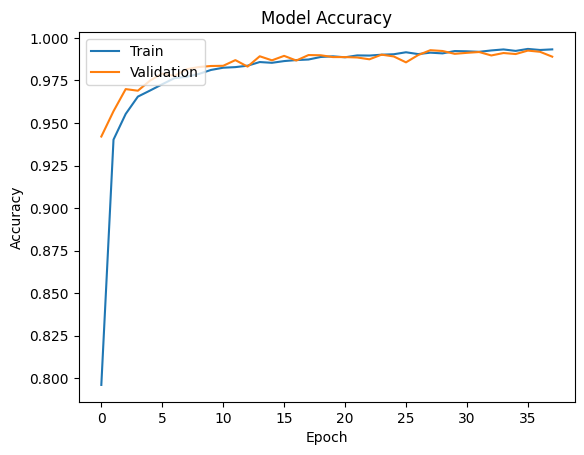

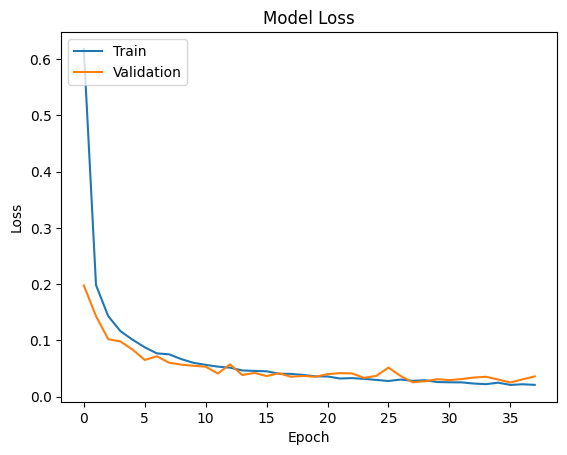

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc= 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc= 'upper left')
plt.show()

In [19]:
train = model.evaluate(train_gen)
val= model.evaluate(val_gen)

print('-' * 50)
print('-' * 50)

print(f'Train Loss: {train[0]}\nTrain Accuracy: {train[1]}')

print('-' * 50)
print('-' * 50)

print(f'Validation Loss: {val[0]}\nValidation Accuracy: {val[1]}')

print('-' * 50)
print('-' * 50)

263/263 [==============================] - 5s 18ms/step - loss: 0.0237 - accuracy: 0.9937
--------------------------------------------------
--------------------------------------------------
Train Loss: 0.01849333755671978
Train Accuracy: 0.9941964149475098
--------------------------------------------------
--------------------------------------------------
Validation Loss: 0.023736415430903435
Validation Accuracy: 0.9936904907226562
--------------------------------------------------
--------------------------------------------------


In [20]:
pred = model.predict(x_test)

875/875 [==============================] - 6s 6ms/step


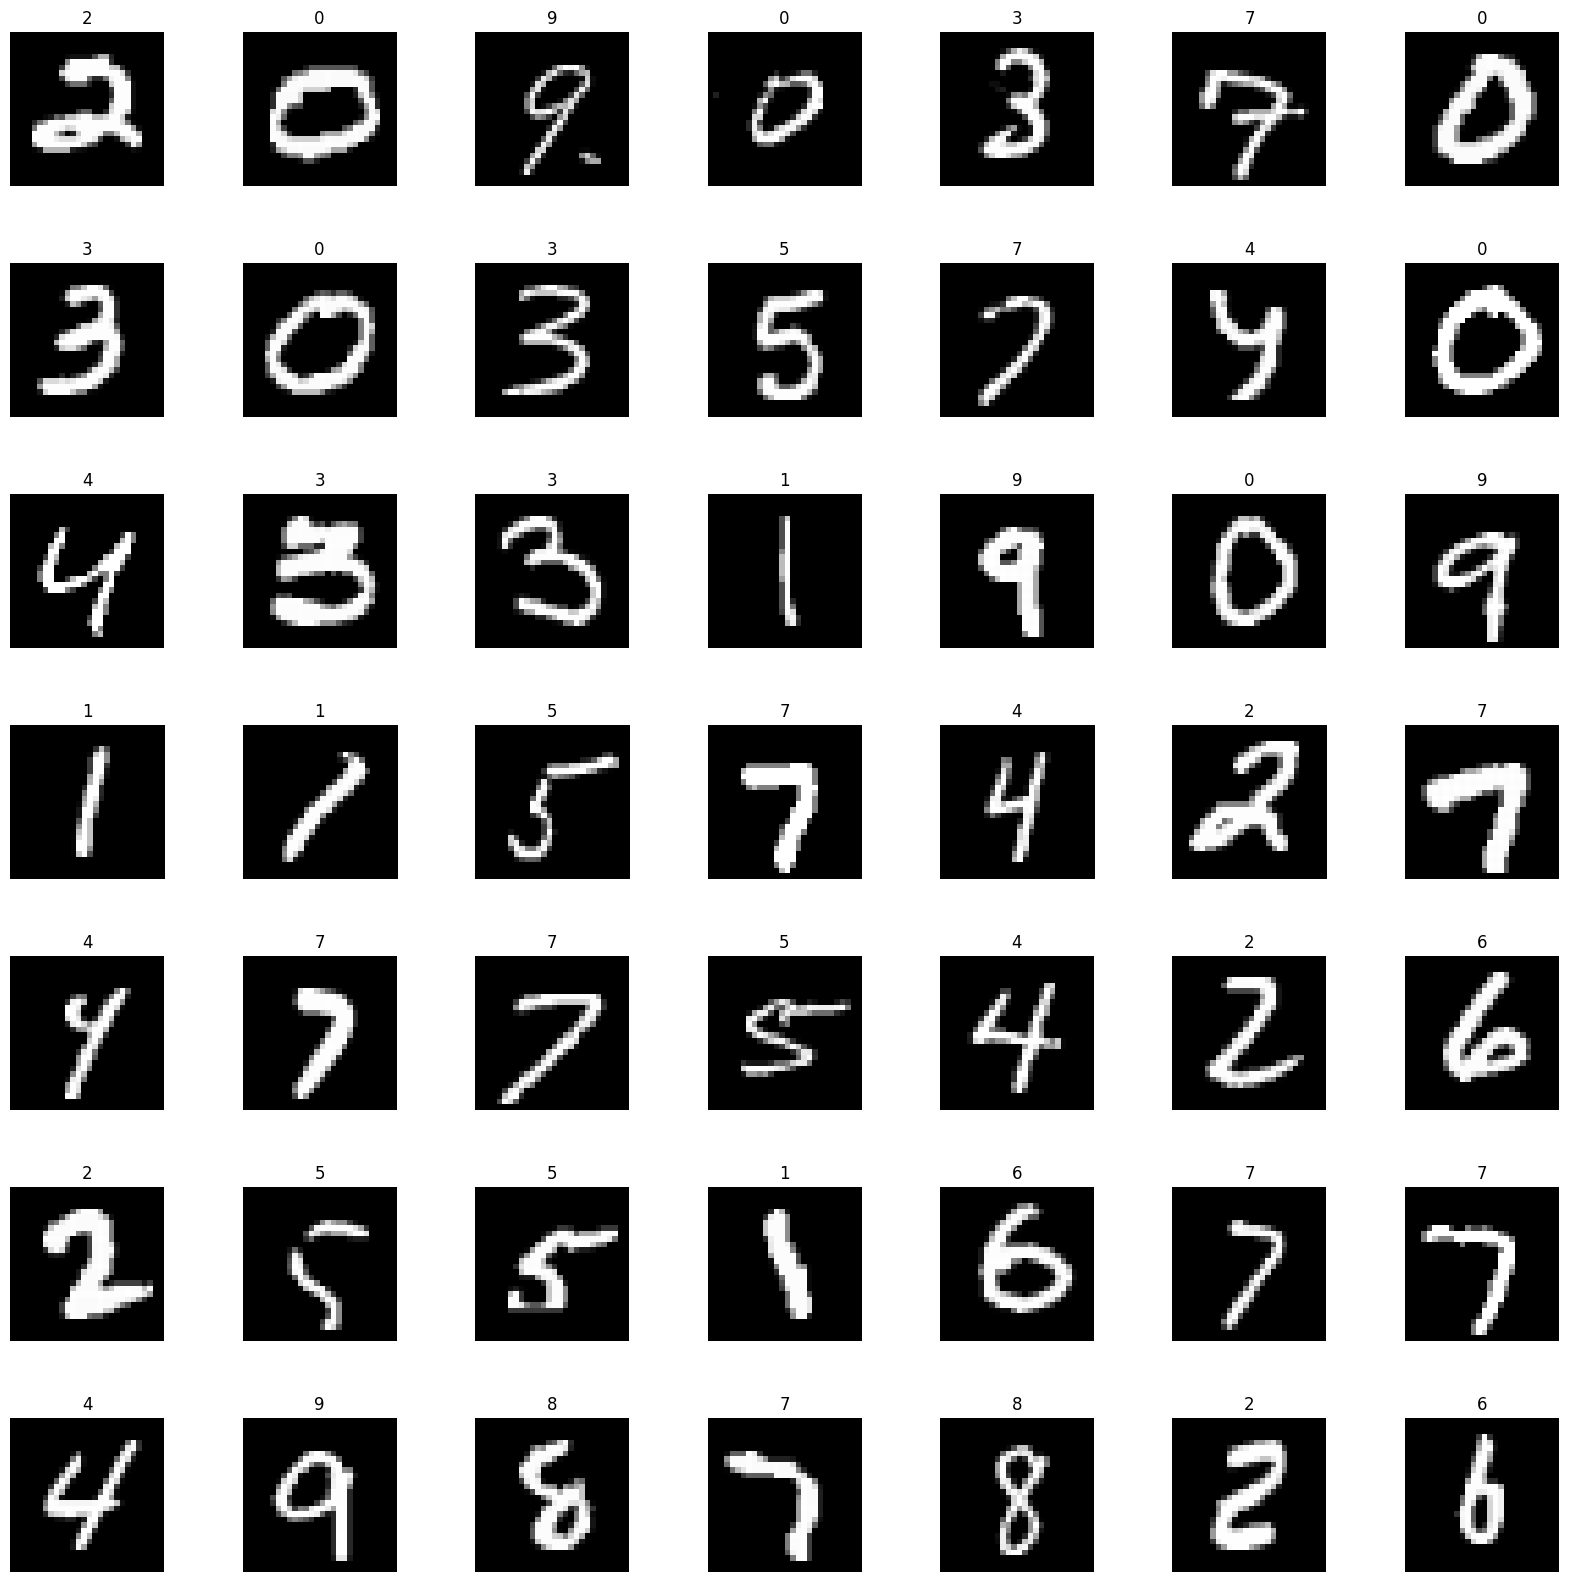

In [21]:
fig, axes = plt.subplots(7, 7, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_test[i], cmap= 'gray')
    ax.set_title(np.argmax(pred, axis=-1)[i])
    ax.axis('off')
plt.show()

In [22]:
model.save('model_99%.h5')